In [194]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import  metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns 
from statistics import mode, multimode

import warnings
warnings.filterwarnings('ignore')

In [195]:
train = pd.read_csv("C:\\Users\\aleks\\Desktop\\train.csv", sep =',')
test = pd.read_csv("C:\\Users\\aleks\\Desktop\\podstawy sztucznej inteligencji\\projekt test.csv", sep =',')

In [196]:
train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23.0,Business travel,Eco,192.0,2.0,1.0,...,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49.0,Business travel,Business,2347.0,4.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30.0,Business travel,Business,1995.0,1.0,1.0,...,4.0,3.0,2.0,4.0,5.0,5.0,4.0,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22.0,Business travel,Eco,1000.0,1.0,1.0,...,1.0,4.0,5.0,1.0,5.0,4.0,1.0,0,0.0,neutral or dissatisfied


In [197]:
test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52.0,Business travel,Eco,160.0,5.0,4,...,5,5,5.0,5.0,2.0,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36.0,Business travel,Business,2863.0,1.0,1,...,4,4,4.0,4.0,3.0,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20.0,Business travel,Eco,192.0,2.0,0,...,2,4,1.0,3.0,2.0,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44.0,Business travel,Business,3377.0,0.0,0,...,1,1,1.0,1.0,3.0,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49.0,Business travel,Eco,1182.0,2.0,3,...,2,2,2.0,2.0,4.0,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34.0,Business travel,Business,526.0,3.0,3,...,4,3,2.0,4.0,4.0,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23.0,Business travel,Business,646.0,4.0,4,...,4,4,5.0,5.0,5.0,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17.0,Personal Travel,Eco,828.0,2.0,5,...,2,4,3.0,4.0,5.0,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14.0,Business travel,Business,1127.0,3.0,3,...,4,3,2.0,5.0,4.0,5,4,0,0.0,satisfied


In [198]:
print(train.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    6
Type of Travel                         0
Class                                  0
Flight Distance                        1
Inflight wifi service                  2
Departure/Arrival time convenient      1
Ease of Online booking                 3
Gate location                          1
Food and drink                         2
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 1
On-board service                       1
Leg room service                       1
Baggage handling                       1
Checkin service                        1
Inflight service                       2
Cleanliness                            2
Departure Delay in Minutes             0
Arrival Delay in Minutes             311
satisfaction    

In [199]:
print(test.isnull().sum())

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   9
Type of Travel                        0
Class                                 0
Flight Distance                       4
Inflight wifi service                 3
Departure/Arrival time convenient     0
Ease of Online booking                1
Gate location                         1
Food and drink                        1
Online boarding                       2
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      1
Baggage handling                      1
Checkin service                       1
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             84
satisfaction                          0


In [200]:
train.loc[train.Age.isna(), 'Age'] = train['Age'].mean()
train.loc[train['Arrival Delay in Minutes'].isna(), 'Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].mean()
train.loc[train['Flight Distance'].isna(), 'Flight Distance'] = train['Flight Distance'].mean()
train.loc[train['Inflight wifi service'].isna(), 'Inflight wifi service'] = train['Inflight wifi service'].median()
train.loc[train['Ease of Online booking'].isna(), 'Ease of Online booking'] = train['Ease of Online booking'].mode()[0]
train.loc[train['Gate location'].isna(), 'Gate location'] = train['Gate location'].mode()[0]
train.loc[train['Food and drink'].isna(), 'Food and drink'] = train['Food and drink'].mode()[0]
train.loc[train['Online boarding'].isna(), 'Online boarding'] = train['Online boarding'].mode()[0]
train.loc[train['Leg room service'].isna(), 'Leg room service'] = train['Leg room service'].median()
train.loc[train['Baggage handling'].isna(), 'Baggage handling'] = train['Baggage handling'].median()
train.loc[train['Checkin service'].isna(), 'Checkin service'] = train['Checkin service'].median()
train.loc[train['Departure/Arrival time convenient'].isna(), 'Departure/Arrival time convenient'] = train['Departure/Arrival time convenient'].mode()[0]
train.loc[train['Inflight entertainment'].isna(), 'Inflight entertainment'] = train['Inflight entertainment'].mode()[0]
train.loc[train['On-board service'].isna(), 'On-board service'] = train['On-board service'].mode()[0]
train.loc[train['Inflight service'].isna(), 'Inflight service'] = train['Inflight service'].mode()[0]
train.loc[train['Cleanliness'].isna(), 'Cleanliness'] = train['Cleanliness'].mode()[0]

In [201]:
print(train.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [202]:
test.loc[test['Age'].isna(), 'Age'] = test['Age'].mean()
test.loc[test['Arrival Delay in Minutes'].isna(), 'Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].mean()
test.loc[test['Flight Distance'].isna(), 'Flight Distance'] = test['Flight Distance'].mean()
test.loc[test['Inflight wifi service'].isna(), 'Inflight wifi service'] = test['Inflight wifi service'].median()
test.loc[test['Ease of Online booking'].isna(), 'Ease of Online booking'] = test['Ease of Online booking'].mode()[0]
test.loc[test['Gate location'].isna(), 'Gate location'] = test['Gate location'].mode()[0]
test.loc[test['Food and drink'].isna(), 'Food and drink'] = test['Food and drink'].mode()[0]
test.loc[test['Online boarding'].isna(), 'Online boarding'] = test['Online boarding'].mode()[0]
test.loc[test['Leg room service'].isna(), 'Leg room service'] = test['Leg room service'].median()
test.loc[test['Baggage handling'].isna(), 'Baggage handling'] = test['Baggage handling'].median()
test.loc[test['Checkin service'].isna(), 'Checkin service'] = test['Checkin service'].median()
test.loc[test['Departure/Arrival time convenient'].isna(), 'Departure/Arrival time convenient'] = test['Departure/Arrival time convenient'].mode()[0]
test.loc[test['Inflight entertainment'].isna(), 'Inflight entertainment'] = test['Inflight entertainment'].mode()[0]
test.loc[test['On-board service'].isna(), 'On-board service'] = test['On-board service'].mode()[0]
test.loc[test['Inflight service'].isna(), 'Inflight service'] = test['Inflight service'].mode()[0]
test.loc[test['Cleanliness'].isna(), 'Cleanliness'] = test['Cleanliness'].mode()[0]

In [203]:
print(test.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [204]:
train = train.dropna()
test = test.dropna()
data = pd.concat([train, test], axis=0, sort=False)

<Axes: xlabel='satisfaction', ylabel='count'>

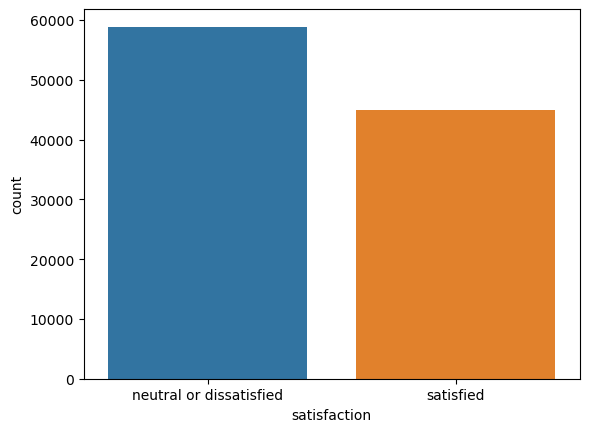

In [205]:
#porównajmy sobie satisfied z resztą
sns.countplot(data=train, x='satisfaction')

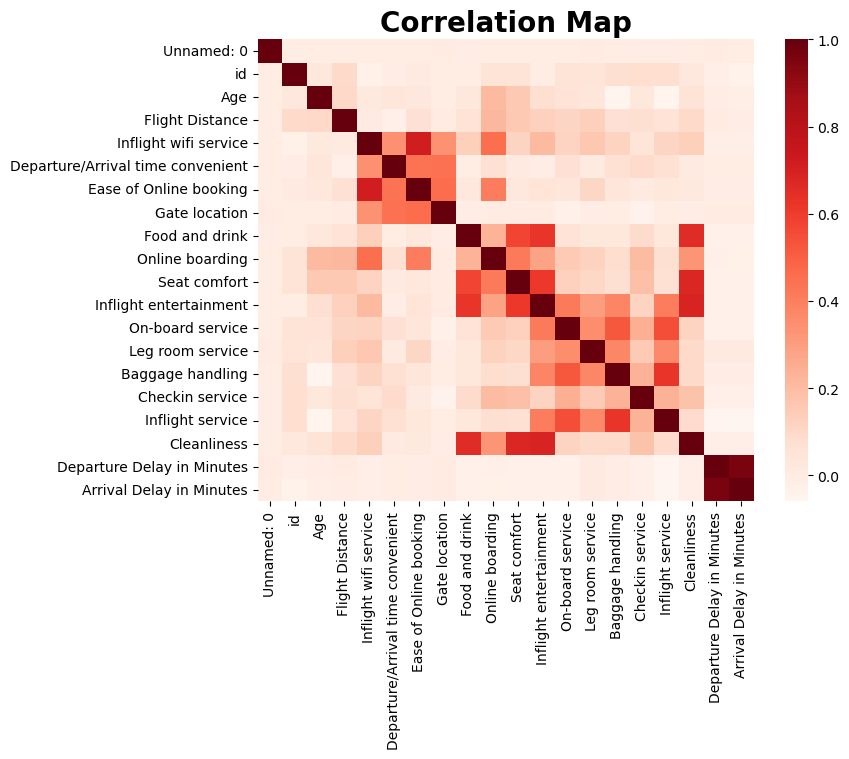

In [206]:
#zróbmy macierz korelacji
data = pd.concat([train, test], axis=0, sort=False)
corr_df = data.corr()
fig, axs = plt.subplots(figsize=(8, 6))
ax=sns.heatmap(corr_df, cmap = "Reds").set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()

In [207]:
#oraz wykresy
#sns.pairplot(train)
#plt.show()

<Axes: xlabel='Class', ylabel='count'>

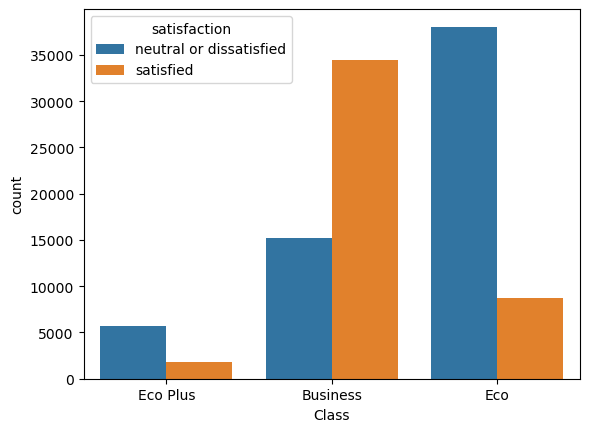

In [208]:
sns.countplot(data=train, x='Class', hue='satisfaction')

<Axes: xlabel='Customer Type', ylabel='count'>

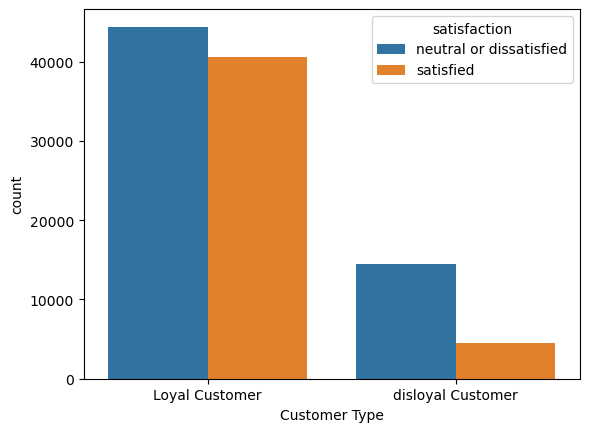

In [209]:
sns.countplot(data=train, x='Customer Type', hue='satisfaction')

<Axes: xlabel='Gender', ylabel='count'>

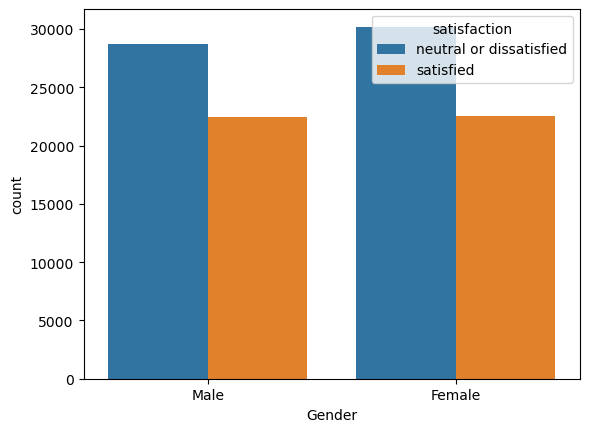

In [210]:
sns.countplot(data=train, x='Gender', hue='satisfaction')

<Axes: xlabel='Age', ylabel='satisfaction'>

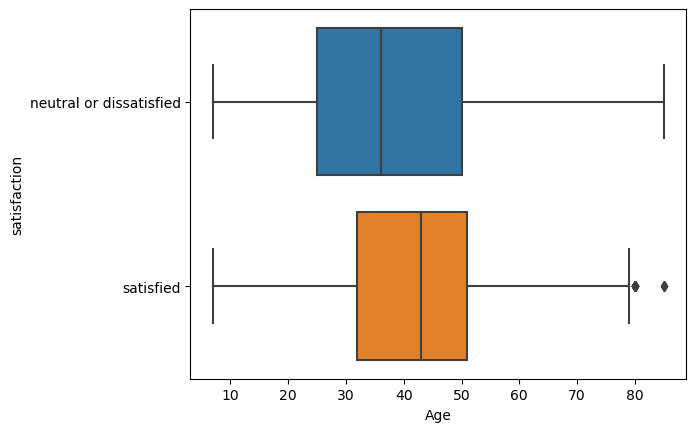

In [211]:
sns.boxplot(data=train, x="Age", y="satisfaction")

<Axes: xlabel='Flight Distance', ylabel='satisfaction'>

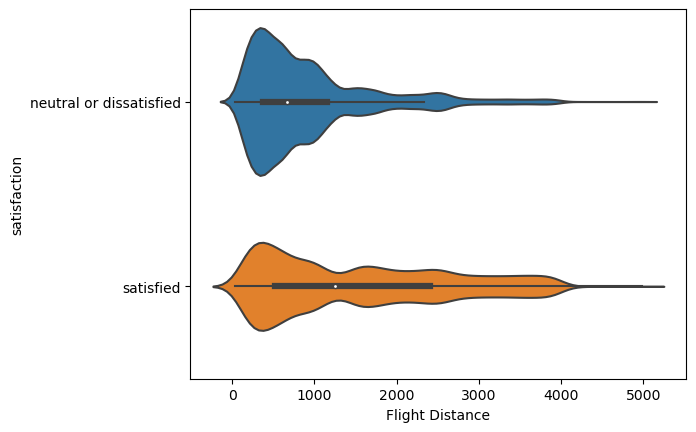

In [212]:
sns.violinplot(data=train, x='Flight Distance', y='satisfaction')

In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  float64
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  float64
 8   Inflight wifi service              103904 non-null  float64
 9   Departure/Arrival time convenient  103904 non-null  float64
 10  Ease of Online booking             103904 non-null  float64
 11  Gate location                      1039

In [214]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  float64
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  float64
 8   Inflight wifi service              25976 non-null  float64
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  float64
 11  Gate location                      25976 non-null  flo

In [215]:
#widać że niektóre dane są obiektamy, zmieńmy to

train['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [216]:
test['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [217]:

def change_class(class2):
        if class2 == "Eco":
            return 0
        elif class2 == "Eco Plus":
            return 1
        elif class2 == "Business":
            return 2
        
train['Class'] = train.apply(lambda x: change_class(x['Class']), axis=1)
test['Class'] = test.apply(lambda x: change_class(x['Class']), axis=1)

In [218]:
train['Class']

0         1
1         2
2         2
3         2
4         2
         ..
103899    0
103900    2
103901    2
103902    0
103903    2
Name: Class, Length: 103904, dtype: int64

In [219]:
test['Class']

0        0
1        2
2        0
3        2
4        0
        ..
25971    2
25972    2
25973    0
25974    2
25975    0
Name: Class, Length: 25976, dtype: int64

In [220]:
train['Class'].unique()

array([1, 2, 0], dtype=int64)

In [221]:
test['Class'].unique()

array([0, 2, 1], dtype=int64)

In [222]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [223]:
test['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [224]:
#jak widać jest zmienione

def change_gender(gender):
        if gender == "Male":
            return 1
        elif gender == "Female":
            return 2
        
train['Gender'] = train.apply(lambda x: change_gender(x['Gender']), axis=1)
test['Gender'] = test.apply(lambda x: change_gender(x['Gender']), axis=1)

In [225]:
train['Gender']

0         1
1         1
2         2
3         2
4         1
         ..
103899    2
103900    1
103901    1
103902    2
103903    1
Name: Gender, Length: 103904, dtype: int64

In [226]:
train['Gender']

0         1
1         1
2         2
3         2
4         1
         ..
103899    2
103900    1
103901    1
103902    2
103903    1
Name: Gender, Length: 103904, dtype: int64

In [227]:
train['Gender'].unique()

array([1, 2], dtype=int64)

In [228]:
test['Gender'].unique()

array([2, 1], dtype=int64)

In [229]:
train['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [230]:
test['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [231]:
def change_satisfied(sat):
        if sat == "neutral or dissatisfied":
            return 0
        elif sat == "satisfied":
            return 1
train['satisfaction'] = train.apply(lambda x: change_satisfied(x['satisfaction']), axis=1)
test['satisfaction'] = test.apply(lambda x: change_satisfied(x['satisfaction']), axis=1)

In [232]:
train['satisfaction']

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

In [233]:
test['satisfaction']

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int64

In [234]:
train['satisfaction'].unique()

array([0, 1], dtype=int64)

In [235]:
test['satisfaction'].unique()

array([1, 0], dtype=int64)

In [236]:
train["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [237]:
test["Customer Type"].unique()



array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [238]:
def change_customer(typ):
        if typ == "disloyal Customer":
            return 0
        elif typ =="Loyal Customer":
            return 1
train['Customer Type'] = train.apply(lambda x: change_customer(x['Customer Type']), axis=1)
test['Customer Type'] = test.apply(lambda x: change_customer(x['Customer Type']), axis=1)
train['Customer Type']

0         1
1         0
2         1
3         1
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    1
Name: Customer Type, Length: 103904, dtype: int64

In [239]:
test['Customer Type']

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    1
25974    1
25975    1
Name: Customer Type, Length: 25976, dtype: int64

In [240]:
train["Customer Type"].unique()

array([1, 0], dtype=int64)

In [241]:
test["Customer Type"].unique()

array([1, 0], dtype=int64)

In [242]:
train["Type of Travel"].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [243]:
test["Type of Travel"].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [244]:
#to zamieńmy inaczej

train = pd.get_dummies(train, columns=["Type of Travel"])
test = pd.get_dummies(test, columns=["Type of Travel"])

In [245]:
train.rename({"Type of Travel_Business travel": 'Business travel'}, axis=1, inplace=True)
train.rename({"Type of Travel_Personal Travel": 'Personal travel'}, axis=1, inplace=True)

test.rename({"Type of Travel_Business travel": 'Business travel'}, axis=1, inplace=True)
test.rename({"Type of Travel_Personal Travel": 'Personal travel'}, axis=1, inplace=True)


In [246]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  int64  
 3   Customer Type                      103904 non-null  int64  
 4   Age                                103904 non-null  float64
 5   Class                              103904 non-null  int64  
 6   Flight Distance                    103904 non-null  float64
 7   Inflight wifi service              103904 non-null  float64
 8   Departure/Arrival time convenient  103904 non-null  float64
 9   Ease of Online booking             103904 non-null  float64
 10  Gate location                      103904 non-null  float64
 11  Food and drink                     1039

In [247]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  int64  
 3   Customer Type                      25976 non-null  int64  
 4   Age                                25976 non-null  float64
 5   Class                              25976 non-null  int64  
 6   Flight Distance                    25976 non-null  float64
 7   Inflight wifi service              25976 non-null  float64
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  float64
 10  Gate location                      25976 non-null  float64
 11  Food and drink                     25976 non-null  flo

In [248]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business travel,Personal travel
0,0,70172,1,1,13.0,1,460.0,3.0,4.0,3.0,...,3.0,4.0,4.0,5.0,5.0,25,18.0,0,0,1
1,1,5047,1,0,25.0,2,235.0,3.0,2.0,3.0,...,5.0,3.0,1.0,4.0,1.0,1,6.0,0,1,0
2,2,110028,2,1,26.0,2,1142.0,2.0,2.0,2.0,...,3.0,4.0,4.0,4.0,5.0,0,0.0,1,1,0
3,3,24026,2,1,25.0,2,562.0,2.0,5.0,5.0,...,5.0,3.0,1.0,4.0,2.0,11,9.0,0,1,0
4,4,119299,1,1,61.0,2,214.0,3.0,3.0,3.0,...,4.0,4.0,3.0,3.0,3.0,0,0.0,1,1,0


In [249]:
#wybieramy satysfakcję, usuwamy ją z danych i wybieramy 10000 probek, żeby nie uczyc na wszystkich

X_train_validation = train.sample(10000, random_state=1)
y_train_validation = X_train_validation['satisfaction']
del X_train_validation['satisfaction']

train = train.sample(10000, random_state=1)
y_train = train['satisfaction']
del train['satisfaction']

train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Business travel,Personal travel
65830,65830,23509,1,1,41.0,0,303.0,5.0,3.0,3.0,...,4.0,3.0,3.0,5.0,5.0,5.0,0,0.0,1,0
41026,41026,31011,2,1,18.0,2,391.0,1.0,5.0,5.0,...,4.0,3.0,3.0,1.0,4.0,1.0,17,17.0,1,0
95867,95867,29345,2,1,13.0,1,569.0,2.0,4.0,2.0,...,5.0,4.0,4.0,5.0,5.0,1.0,0,0.0,0,1
75679,75679,50242,1,0,23.0,0,109.0,1.0,0.0,1.0,...,2.0,5.0,5.0,3.0,1.0,3.0,0,0.0,1,0
52958,52958,22244,1,1,23.0,2,83.0,4.0,5.0,0.0,...,3.0,5.0,4.0,3.0,5.0,5.0,0,0.0,0,1


In [250]:
X_train = train

In [251]:
y_test = test['satisfaction']
del test['satisfaction']
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Business travel,Personal travel
0,0,19556,2,1,52.0,0,160.0,5.0,4,3.0,...,5,5.0,5.0,2.0,5,5,50,44.0,1,0
1,1,90035,2,1,36.0,2,2863.0,1.0,1,3.0,...,4,4.0,4.0,3.0,4,5,0,0.0,1,0
2,2,12360,1,0,20.0,0,192.0,2.0,0,2.0,...,4,1.0,3.0,2.0,2,2,0,0.0,1,0
3,3,77959,1,1,44.0,2,3377.0,0.0,0,0.0,...,1,1.0,1.0,3.0,1,4,0,6.0,1,0
4,4,36875,2,1,49.0,0,1182.0,2.0,3,4.0,...,2,2.0,2.0,4.0,2,4,0,20.0,1,0


In [252]:
X_test = test

In [159]:
#############################################################################################################

In [160]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
models = {}

In [161]:
pipe1 = Pipeline([
    ('preprocessing', StandardScaler()), 
    ('classifier', LogisticRegression(C=1, solver='newton-cg'))])

param_grid_1 = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(pipe1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 10}

In [162]:
pipe_2 = Pipeline([
        ('preprocessing', StandardScaler()),
        ('classifier', SVC(kernel='linear'))])

param_grid_2 = {'classifier__C': [0.001, 0.01, 0.1, 1],
              'classifier__gamma': [0.00001,0.0001, 0.001, 0.01]}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.1, 'classifier__gamma': 1e-05}

In [163]:
pipe_3 = Pipeline([
        ('preprocessing', StandardScaler()),
        ('classifier', SVC(kernel='poly'))])

param_grid_3 = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__C': 0.1, 'classifier__gamma': 0.1}

In [164]:
pipe_4 = Pipeline([
        ('preprocessing', StandardScaler()),
        ('classifier', SVC(kernel='rbf'))])

param_grid_4 = {'classifier__C': [0.1, 1, 10, 100,1000],
              'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__C': 100, 'classifier__gamma': 0.01}

In [165]:
from sklearn.ensemble import RandomForestClassifier

pipe_5 = Pipeline([
        ('preprocessing', StandardScaler()), 
        ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))])

param_grid_5 = {'classifier__n_estimators': [5, 10, 50],
              'classifier__max_leaf_nodes': [20, 30,35],
              'classifier__max_depth': [5,10, 20]}

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 35,
 'classifier__n_estimators': 10}

In [166]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
pipe_6 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', AdaBoostClassifier(
                       DecisionTreeClassifier(random_state=42),
                       n_estimators=500,
                       learning_rate=0.5))])

param_grid_6 = {'classifier__n_estimators': [50,100,150],
              'classifier__learning_rate': [0.1, 0.2, 0.3,0.5,0.6,0.7,0.8,0.9]}

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__learning_rate': 0.8, 'classifier__n_estimators': 150}

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_7 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(
                      n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))])

param_grid_7 = {'classifier__n_estimators': [100, 200, 250],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]}

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__learning_rate': 0.2, 'classifier__n_estimators': 200}

In [168]:
from sklearn.neighbors import KNeighborsClassifier
pipe_8 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', KNeighborsClassifier())])

param_grid_8 = {
    'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_neighbors': [1, 2, 3, 5, 10, 100]}

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)
grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__n_neighbors': 10, 'preprocessing': StandardScaler()}

In [169]:
pipe_9 = Pipeline([('preprocessing', StandardScaler()), ('classifier', 
                                                         DecisionTreeClassifier(random_state=0))])
param_grid_9 = {'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__max_depth': [1, 2, 5, 10, 100],
    'classifier__min_samples_leaf': [1, 2, 4, 10]}

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__max_depth': 10,
 'classifier__min_samples_leaf': 4,
 'preprocessing': MinMaxScaler()}

In [170]:
from sklearn.ensemble import ExtraTreesClassifier
pipe_10 = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', ExtraTreesClassifier(n_jobs=-1, random_state=42))])
param_grid_10 = {'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_estimators': [50, 100, 500, 1000],
    'classifier__max_leaf_nodes': [8, 16, 64, 128,256]}

grid_10 = GridSearchCV(pipe_10, param_grid_10, cv=kfold, return_train_score=True)
grid_10.fit(X_train, y_train)
grid_10.best_params_

{'classifier__max_leaf_nodes': 256,
 'classifier__n_estimators': 500,
 'preprocessing': MinMaxScaler()}

In [171]:
from sklearn import  metrics


models = []
models.append(('LR', grid_1.best_estimator_))
models.append(('SVC linear', grid_2.best_estimator_))
models.append(('SVC poly', grid_3.best_estimator_))
models.append(('SVC rbf', grid_4.best_estimator_))
models.append(('RandomForest', grid_5.best_estimator_))
models.append(('AdaBoost', grid_6.best_estimator_))
models.append(('GradientBoosting', grid_7.best_estimator_))
models.append(('KNeighbours', grid_8.best_estimator_))
models.append(('DecisionTree', grid_9.best_estimator_))
models.append(('ExtraTrees', grid_10.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='micro')))
    print("recall_score: {}".format(metrics.recall_score(y_test, model.predict(X_test), average='micro')))
    print("f1_score: {}".format(metrics.f1_score(y_test, model.predict(X_test), average='micro')))
    print("accuracy_score: {}".format(metrics.accuracy_score(y_test, model.predict(X_test))))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='micro'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='micro'))
    f1_score.append(metrics.f1_score(y_test, model.predict(X_test), average='micro'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

LR
precision_score: 0.872112719433323
recall_score: 0.872112719433323
f1_score: 0.872112719433323
accuracy_score: 0.872112719433323
SVC linear
precision_score: 0.8750769941484448
recall_score: 0.8750769941484448
f1_score: 0.8750769941484448
accuracy_score: 0.8750769941484448
SVC poly
precision_score: 0.9221204188481675
recall_score: 0.9221204188481675
f1_score: 0.9221204188481675
accuracy_score: 0.9221204188481675
SVC rbf
precision_score: 0.9433708038189098
recall_score: 0.9433708038189098
f1_score: 0.9433708038189098
accuracy_score: 0.9433708038189098
RandomForest
precision_score: 0.9161533723437019
recall_score: 0.9161533723437019
f1_score: 0.9161533723437019
accuracy_score: 0.9161533723437019
AdaBoost
precision_score: 0.9192331382814906
recall_score: 0.9192331382814906
f1_score: 0.9192331382814906
accuracy_score: 0.9192331382814906
GradientBoosting
precision_score: 0.9530335694487219
recall_score: 0.9530335694487219
f1_score: 0.9530335694487219
accuracy_score: 0.9530335694487219
KNe

In [172]:
import pandas as pd
tab = {'precision_score': precision_score, 
       'recall_score': recall_score, 
       'f1_score': f1_score,
       'accuracy_score' : accuracy_score
      }
df = pd.DataFrame(data=tab)
df.insert(loc=0, column='Method', value=['LR', 'SVC linear', 'SVC poly','SVC rbf',"RandomForest" ,"AdaBoost", "GradientBoosting", "KNeighbours", "DecisionTree", "ExtraTrees"])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,LR,0.872113,0.872113,0.872113,0.872113
1,SVC linear,0.875077,0.875077,0.875077,0.875077
2,SVC poly,0.922120,0.922120,0.922120,0.922120
3,SVC rbf,0.943371,0.943371,0.943371,0.943371
4,RandomForest,0.916153,0.916153,0.916153,0.916153
5,AdaBoost,0.919233,0.919233,0.919233,0.919233
6,GradientBoosting,0.953034,0.953034,0.953034,0.953034
7,KNeighbours,0.902910,0.902910,0.902910,0.902910
8,DecisionTree,0.934016,0.934016,0.934016,0.934016
9,ExtraTrees,0.934478,0.934478,0.934478,0.934478


LR
roc_score: 0.8686818575680632
SVC linear
roc_score: 0.8705892969967567
SVC poly
roc_score: 0.9192595739458496
SVC rbf
roc_score: 0.9413081235916017
RandomForest
roc_score: 0.9130354019585715
AdaBoost
roc_score: 0.918641629416835
GradientBoosting
roc_score: 0.9510168197114047
KNeighbours
roc_score: 0.8945560938946875
DecisionTree
roc_score: 0.9320837455395689
ExtraTrees
roc_score: 0.9303303206043951


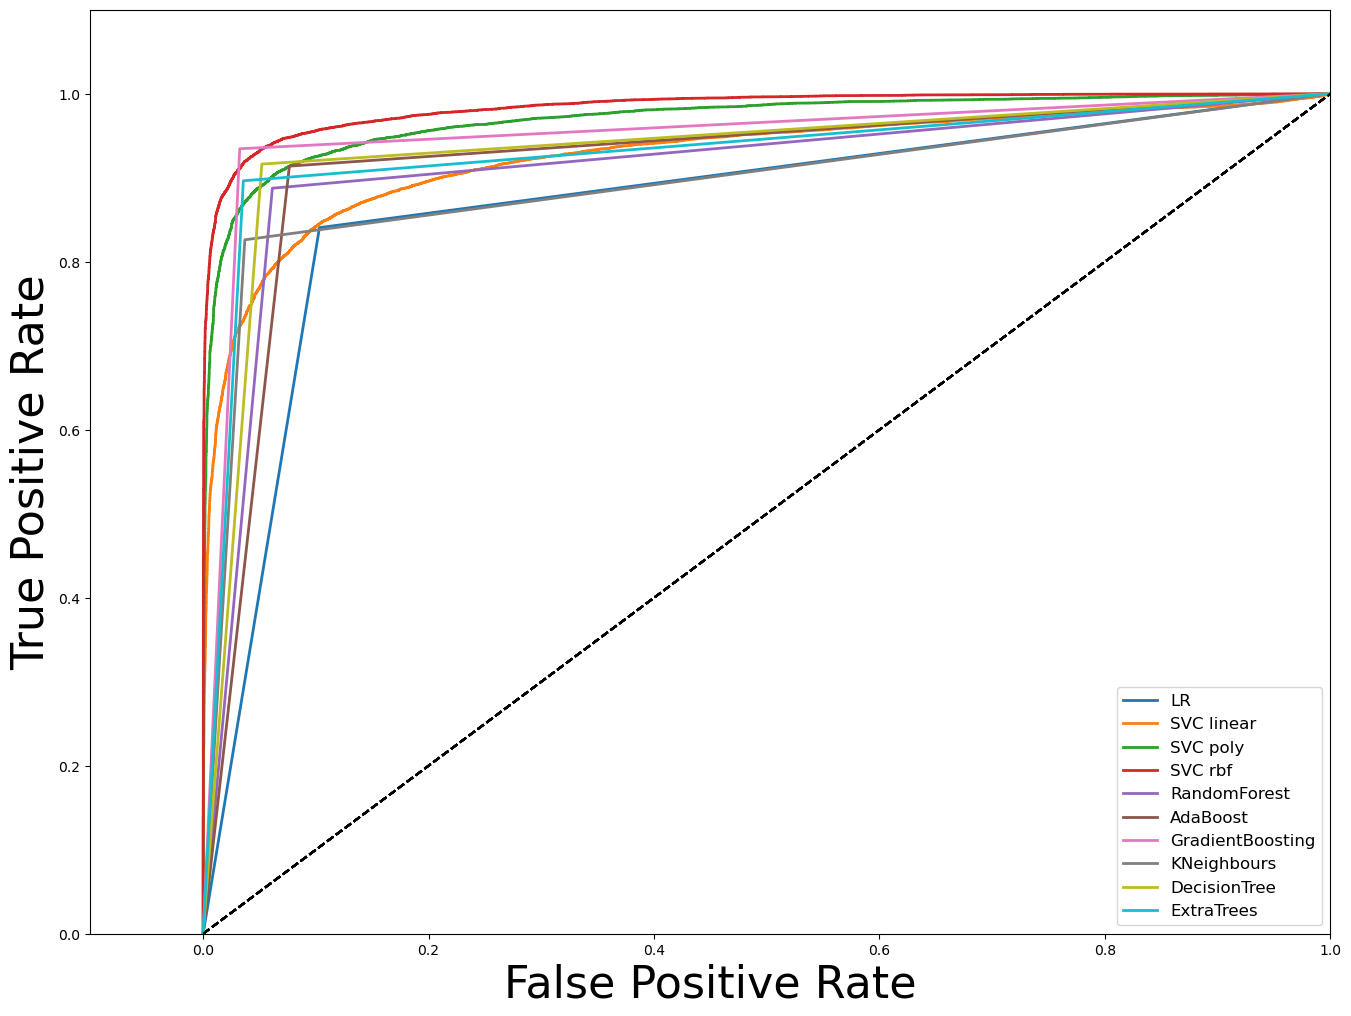

In [173]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


plt.figure(figsize=(16, 12))
for name, model in models:
    print(name)
    print("roc_score: {}".format( roc_auc_score(y_test, model.predict(X_test))))
    if (name == 'SVC linear' or name == 'SVC poly' or name == 'SVC rbf'):
        preds = model.decision_function(X_test)
    else: 
        preds = (model.predict(X_test) > 0.5).astype("int32")       
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    plt.plot(fpr, tpr, linewidth=2, label=name)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.1, 1, 0, 1.1])
    plt.xlabel('False Positive Rate', fontsize=32)
    plt.ylabel('True Positive Rate', fontsize=32)
        
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [174]:
############################################################################

In [253]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.callbacks import EarlyStopping
from keras.callbacks import History
from keras.layers import BatchNormalization
from keras.layers import Activation
from tensorflow.python.keras.layers import Dropout

clear_session()
earlyStopping = EarlyStopping(monitor='loss', patience=20)
history_1 = History()
model_1 = Sequential()
model_1.add(Dense(100,activation="relu",input_shape=(X_train.shape[1],)))
model_1.add(Dense(1,activation="sigmoid"))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 79.7676 - accuracy: 0.5424 - val_loss: 87.8804 - val_accuracy: 0.4539
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 43.8570 - accuracy: 0.5505 - val_loss: 32.8505 - val_accuracy: 0.5703
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 40.6803 - accuracy: 0.5541 - val_loss: 18.9480 - val_accuracy: 0.6404
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 35.0677 - accuracy: 0.5502 - val_loss: 29.2507 - val_accuracy: 0.6099
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 35.5108 - accuracy: 0.5575 - val_loss: 15.1799 - val_accuracy: 0.5978
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 40.1771 - accuracy: 0.5675 - val_loss: 12.7971 - val_accuracy: 0.6072
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 34.7319 - accuracy: 0.5636 - val_loss: 29.1056 - val_ac

313/313 [==============================] - 1s 3ms/step - loss: 13.5087 - accuracy: 0.6796 - val_loss: 5.0410 - val_accuracy: 0.7897
Epoch 58/100
313/313 [==============================] - 1s 4ms/step - loss: 13.5628 - accuracy: 0.6889 - val_loss: 4.8275 - val_accuracy: 0.7834
Epoch 59/100
313/313 [==============================] - 1s 4ms/step - loss: 13.5036 - accuracy: 0.6860 - val_loss: 30.1337 - val_accuracy: 0.6282
Epoch 60/100
313/313 [==============================] - 1s 4ms/step - loss: 18.3845 - accuracy: 0.6580 - val_loss: 9.5941 - val_accuracy: 0.7507
Epoch 61/100
313/313 [==============================] - 1s 4ms/step - loss: 16.4538 - accuracy: 0.6819 - val_loss: 8.7388 - val_accuracy: 0.7076
Epoch 62/100
313/313 [==============================] - 1s 4ms/step - loss: 15.0572 - accuracy: 0.6919 - val_loss: 9.2397 - val_accuracy: 0.7157
Epoch 63/100
313/313 [==============================] - 1s 4ms/step - loss: 17.2759 - accuracy: 0.6755 - val_loss: 21.5271 - val_accuracy: 0.6

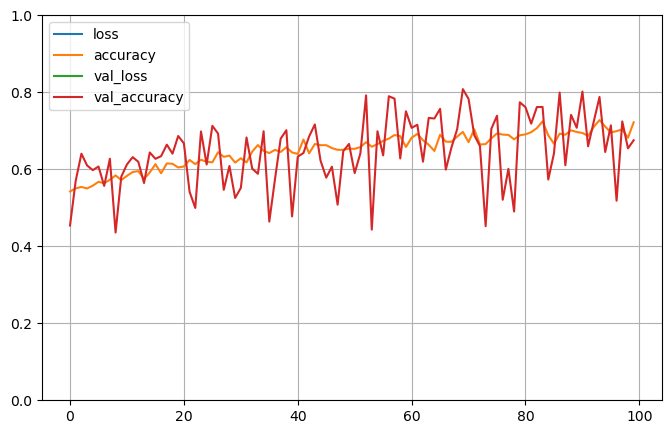

313/313 [==============================] - 1s 2ms/step - loss: 18.9164 - accuracy: 0.6754


[18.916357040405273, 0.6754000186920166]

In [254]:
model_1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_1 = model_1.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
model_1.evaluate(X_train_validation, y_train_validation)

In [255]:
clear_session()
history_2 = History()
model_2 = Sequential()
model_2.add(Dense(100,activation="relu",input_shape=(X_train.shape[1],)))
model_2.add(Dense(50,activation="relu"))
model_2.add(Dense(1,activation="sigmoid"))
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2600      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,701
Trainable params: 7,701
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 142.3540 - accuracy: 0.5357 - val_loss: 344.8893 - val_accuracy: 0.4243
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 85.4004 - accuracy: 0.5442 - val_loss: 63.0461 - val_accuracy: 0.5990
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 69.2131 - accuracy: 0.5442 - val_loss: 33.2356 - val_accuracy: 0.5852
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 97.0583 - accuracy: 0.5414 - val_loss: 34.7470 - val_accuracy: 0.5518
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 60.4066 - accuracy: 0.5538 - val_loss: 88.6495 - val_accuracy: 0.5282
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 76.8597 - accuracy: 0.5513 - val_loss: 32.4917 - val_accuracy: 0.6121
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 58.9461 - accuracy: 0.5522 - val_loss: 82.5180 - val_

313/313 [==============================] - 1s 4ms/step - loss: 8.5133 - accuracy: 0.6333 - val_loss: 6.6306 - val_accuracy: 0.5126
Epoch 58/100
313/313 [==============================] - 1s 4ms/step - loss: 5.6390 - accuracy: 0.6586 - val_loss: 5.6092 - val_accuracy: 0.6613
Epoch 59/100
313/313 [==============================] - 1s 4ms/step - loss: 7.3965 - accuracy: 0.6342 - val_loss: 3.5600 - val_accuracy: 0.7119
Epoch 60/100
313/313 [==============================] - 1s 4ms/step - loss: 6.9533 - accuracy: 0.6402 - val_loss: 3.9880 - val_accuracy: 0.6734
Epoch 61/100
313/313 [==============================] - 1s 4ms/step - loss: 5.9377 - accuracy: 0.6424 - val_loss: 15.9921 - val_accuracy: 0.4316
Epoch 62/100
313/313 [==============================] - 1s 4ms/step - loss: 6.1945 - accuracy: 0.6351 - val_loss: 4.7543 - val_accuracy: 0.5865
Epoch 63/100
313/313 [==============================] - 1s 4ms/step - loss: 5.4363 - accuracy: 0.6534 - val_loss: 4.6014 - val_accuracy: 0.6309
Epoc

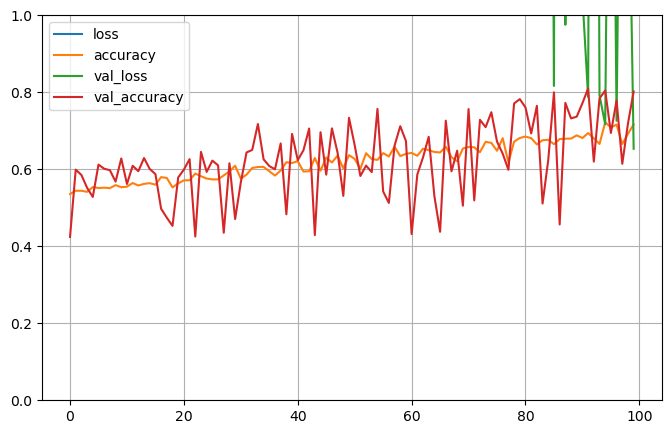

313/313 [==============================] - 1s 2ms/step - loss: 0.6532 - accuracy: 0.8022


[0.6532091498374939, 0.8022000193595886]

In [256]:
model_2.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_2 = model_2.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
model_2.evaluate(X_train_validation, y_train_validation)

In [257]:
clear_session()
history_3 = History()
model_3 = Sequential()
model_3.add(Dense(100,activation="relu",input_shape=(X_train.shape[1],)))
model_3.add(Dense(50,activation="relu"))
model_3.add(Dense(10,activation="relu"))
model_3.add(Dense(1,activation="sigmoid"))
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2600      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 8,171
Trainable params: 8,171
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 3s 5ms/step - loss: 550.5337 - accuracy: 0.5167 - val_loss: 46.1466 - val_accuracy: 0.4817
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 47.5849 - accuracy: 0.5329 - val_loss: 82.3621 - val_accuracy: 0.4950
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 43.9386 - accuracy: 0.5576 - val_loss: 29.8889 - val_accuracy: 0.5723
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 41.6458 - accuracy: 0.5435 - val_loss: 62.2168 - val_accuracy: 0.5194
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 40.6124 - accuracy: 0.5541 - val_loss: 60.4197 - val_accuracy: 0.5909
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 33.1204 - accuracy: 0.5511 - val_loss: 33.4747 - val_accuracy: 0.4674
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 30.3406 - accuracy: 0.5584 - val_loss: 56.6235 - val_a

Epoch 58/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6813 - accuracy: 0.5761 - val_loss: 0.6813 - val_accuracy: 0.5761
Epoch 59/100
313/313 [==============================] - 1s 5ms/step - loss: 0.6814 - accuracy: 0.5761 - val_loss: 0.6813 - val_accuracy: 0.5761
Epoch 60/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6813 - accuracy: 0.5761 - val_loss: 0.6813 - val_accuracy: 0.5762
Epoch 61/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6813 - accuracy: 0.5762 - val_loss: 0.6812 - val_accuracy: 0.5762
Epoch 62/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6813 - accuracy: 0.5761 - val_loss: 0.6812 - val_accuracy: 0.5762
Epoch 63/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6813 - accuracy: 0.5761 - val_loss: 0.6812 - val_accuracy: 0.5762
Epoch 64/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6814 - accuracy: 0.5762 - val_loss: 0.6812 - val_accuracy:

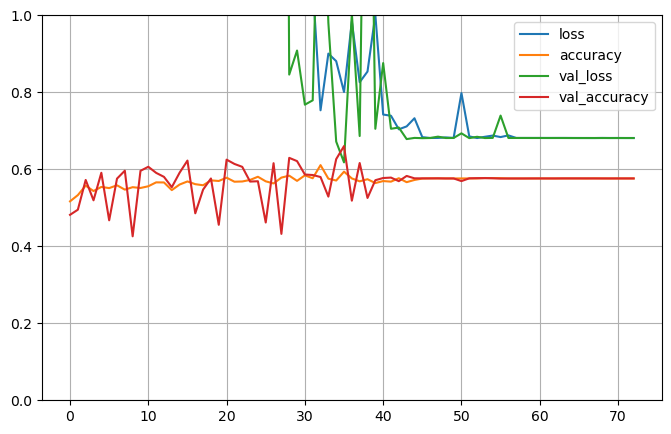

313/313 [==============================] - 1s 2ms/step - loss: 0.6812 - accuracy: 0.5762


[0.681150496006012, 0.576200008392334]

In [258]:
model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_3 = model_3.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
model_3.evaluate(X_train_validation, y_train_validation)

In [259]:
clear_session()
history_4 = History()
model_4 = Sequential()
model_4.add(Dense(50,activation="relu",input_shape=(X_train.shape[1],)))
model_4.add(Dense(25,activation="relu"))
model_4.add(Dense(15,activation="relu"))
model_4.add(Dense(10,activation="relu"))
model_4.add(Dense(1,activation="sigmoid"))
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1300      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 15)                390       
                                                                 
 dense_3 (Dense)             (None, 10)                160       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,136
Trainable params: 3,136
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 3s 6ms/step - loss: 52.2604 - accuracy: 0.5265 - val_loss: 4.3019 - val_accuracy: 0.5898
Epoch 2/100
313/313 [==============================] - 2s 5ms/step - loss: 5.4392 - accuracy: 0.5308 - val_loss: 3.8726 - val_accuracy: 0.5960
Epoch 3/100
313/313 [==============================] - 2s 5ms/step - loss: 3.9222 - accuracy: 0.5413 - val_loss: 1.8440 - val_accuracy: 0.5561
Epoch 4/100
313/313 [==============================] - 1s 5ms/step - loss: 2.8575 - accuracy: 0.5529 - val_loss: 1.0473 - val_accuracy: 0.5744
Epoch 5/100
313/313 [==============================] - 1s 5ms/step - loss: 1.8287 - accuracy: 0.5604 - val_loss: 1.6222 - val_accuracy: 0.4837
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 1.4178 - accuracy: 0.5555 - val_loss: 1.2407 - val_accuracy: 0.4729
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 1.4595 - accuracy: 0.5679 - val_loss: 1.0214 - val_accuracy: 0.614

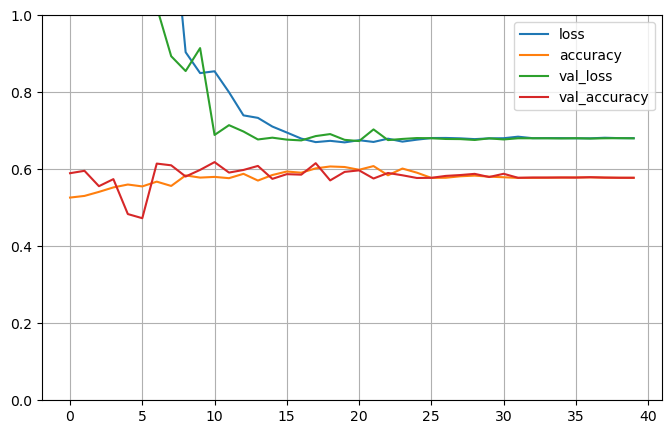

313/313 [==============================] - 1s 2ms/step - loss: 0.6804 - accuracy: 0.5780


[0.6803514361381531, 0.578000009059906]

In [260]:
model_4.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_4 = model_4.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
model_4.evaluate(X_train_validation, y_train_validation)

In [261]:
clear_session()
history_7 = History()
model_7 = Sequential()
model_7.add(Dense(25,activation="relu",input_shape=(X_train.shape[1],)))
model_7.add(Dense(10,activation="relu"))
model_7.add(Dense(1,activation="sigmoid"))
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                650       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 3s 5ms/step - loss: 103.4625 - accuracy: 0.5277 - val_loss: 26.4501 - val_accuracy: 0.5733
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 42.9628 - accuracy: 0.5476 - val_loss: 25.0020 - val_accuracy: 0.6067
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 40.9636 - accuracy: 0.5479 - val_loss: 23.7313 - val_accuracy: 0.6120
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 28.9275 - accuracy: 0.5560 - val_loss: 60.7784 - val_accuracy: 0.4257
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 39.8569 - accuracy: 0.5351 - val_loss: 13.9673 - val_accuracy: 0.6306
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 34.1446 - accuracy: 0.5551 - val_loss: 11.5374 - val_accuracy: 0.6237
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 31.9298 - accuracy: 0.5573 - val_loss: 20.8142 - val_a

313/313 [==============================] - 1s 4ms/step - loss: 14.3662 - accuracy: 0.6308 - val_loss: 12.2275 - val_accuracy: 0.6525
Epoch 58/100
313/313 [==============================] - 1s 4ms/step - loss: 18.8980 - accuracy: 0.6186 - val_loss: 3.1618 - val_accuracy: 0.7624
Epoch 59/100
313/313 [==============================] - 1s 4ms/step - loss: 10.1828 - accuracy: 0.6603 - val_loss: 13.1519 - val_accuracy: 0.6328
Epoch 60/100
313/313 [==============================] - 1s 4ms/step - loss: 17.4081 - accuracy: 0.6286 - val_loss: 4.4086 - val_accuracy: 0.7258
Epoch 61/100
313/313 [==============================] - 1s 4ms/step - loss: 15.6091 - accuracy: 0.6310 - val_loss: 9.1696 - val_accuracy: 0.5698
Epoch 62/100
313/313 [==============================] - 1s 4ms/step - loss: 14.2260 - accuracy: 0.6270 - val_loss: 12.7545 - val_accuracy: 0.6324
Epoch 63/100
313/313 [==============================] - 1s 4ms/step - loss: 8.2322 - accuracy: 0.6735 - val_loss: 7.5613 - val_accuracy: 0.6

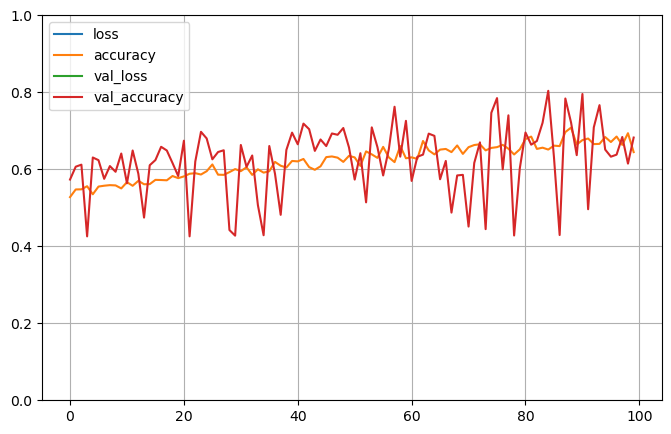

313/313 [==============================] - 1s 2ms/step - loss: 8.8520 - accuracy: 0.6824


[8.852025985717773, 0.6823999881744385]

In [262]:
model_7.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_7 = model_7.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
model_7.evaluate(X_train_validation, y_train_validation)

In [263]:
clear_session()
history_5 = History()
model_5 = Sequential()
model_5.add(Dense(50,activation="relu",input_shape=(X_train.shape[1],)))
model_5.add(Dropout(0.4))
model_5.add(Dense(25,activation="sigmoid"))
model_5.add(Dropout(0.4))
model_5.add(Dense(15,activation="sigmoid"))
model_5.add(Dropout(0.4))
model_5.add(Dense(10,activation="sigmoid"))
model_5.add(Dropout(0.4))
model_5.add(Dense(1,activation="sigmoid"))
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1300      
                                                                 
 module_wrapper (ModuleWrapp  (None, 50)               0         
 er)                                                             
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 module_wrapper_1 (ModuleWra  (None, 25)               0         
 pper)                                                           
                                                                 
 dense_2 (Dense)             (None, 15)                390       
                                                                 
 module_wrapper_2 (ModuleWra  (None, 15)               0

Epoch 1/100
313/313 [==============================] - 3s 6ms/step - loss: 0.7078 - accuracy: 0.5351 - val_loss: 0.6818 - val_accuracy: 0.5759
Epoch 2/100
313/313 [==============================] - 1s 5ms/step - loss: 0.6903 - accuracy: 0.5549 - val_loss: 0.6816 - val_accuracy: 0.5759
Epoch 3/100
313/313 [==============================] - 1s 5ms/step - loss: 0.6867 - accuracy: 0.5611 - val_loss: 0.6817 - val_accuracy: 0.5759
Epoch 4/100
313/313 [==============================] - 1s 5ms/step - loss: 0.6852 - accuracy: 0.5700 - val_loss: 0.6816 - val_accuracy: 0.5759
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6852 - accuracy: 0.5741 - val_loss: 0.6818 - val_accuracy: 0.5759
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6837 - accuracy: 0.5740 - val_loss: 0.6816 - val_accuracy: 0.5759
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6837 - accuracy: 0.5756 - val_loss: 0.6817 - val_accuracy: 0.5759

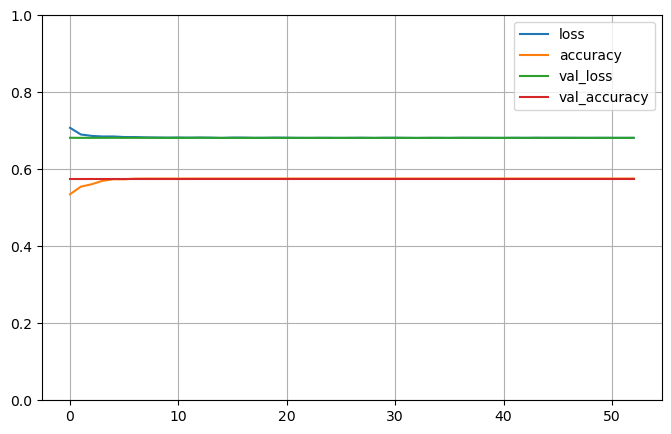

313/313 [==============================] - 1s 2ms/step - loss: 0.6816 - accuracy: 0.5759


[0.6815598011016846, 0.5759000182151794]

In [264]:
model_5.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_5 = model_5.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
model_5.evaluate(X_train_validation, y_train_validation)

In [265]:
clear_session()
history_6 = History()
model_6 = Sequential()
model_6.add(Dense(100, use_bias=False,input_shape=(X_train.shape[1],)))
model_6.add(BatchNormalization())
model_6.add(Activation("sigmoid"))
model_6.add(Dense(50, use_bias=False))
model_6.add(BatchNormalization())
model_6.add(Activation("sigmoid"))
model_6.add(Dense(10, use_bias=False))
model_6.add(BatchNormalization())
model_6.add(Activation("sigmoid"))
model_6.add(Dense(1,activation="sigmoid"))
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2500      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5000      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 50)                0

Epoch 1/100
313/313 [==============================] - 4s 6ms/step - loss: 0.6683 - accuracy: 0.6173 - val_loss: 0.6628 - val_accuracy: 0.6424
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6450 - accuracy: 0.6540 - val_loss: 0.6489 - val_accuracy: 0.6418
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6449 - accuracy: 0.6527 - val_loss: 0.6390 - val_accuracy: 0.6578
Epoch 4/100
313/313 [==============================] - 1s 5ms/step - loss: 0.6407 - accuracy: 0.6534 - val_loss: 0.6353 - val_accuracy: 0.6575
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6324 - accuracy: 0.6619 - val_loss: 0.6493 - val_accuracy: 0.6188
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6176 - accuracy: 0.6731 - val_loss: 0.7021 - val_accuracy: 0.5289
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5718 - accuracy: 0.7085 - val_loss: 0.7155 - val_accuracy: 0.5677

Epoch 58/100
313/313 [==============================] - 1s 5ms/step - loss: 0.3660 - accuracy: 0.8480 - val_loss: 2.0675 - val_accuracy: 0.4404
Epoch 59/100
313/313 [==============================] - 1s 5ms/step - loss: 0.3574 - accuracy: 0.8521 - val_loss: 1.1422 - val_accuracy: 0.6069
Epoch 60/100
313/313 [==============================] - 2s 5ms/step - loss: 0.3587 - accuracy: 0.8509 - val_loss: 1.1186 - val_accuracy: 0.6118
Epoch 61/100
313/313 [==============================] - 1s 5ms/step - loss: 0.3700 - accuracy: 0.8460 - val_loss: 1.5003 - val_accuracy: 0.5352
Epoch 62/100
313/313 [==============================] - 1s 5ms/step - loss: 0.3704 - accuracy: 0.8468 - val_loss: 1.1299 - val_accuracy: 0.6230
Epoch 63/100
313/313 [==============================] - 1s 5ms/step - loss: 0.3673 - accuracy: 0.8464 - val_loss: 0.4622 - val_accuracy: 0.7956
Epoch 64/100
313/313 [==============================] - 1s 5ms/step - loss: 0.3676 - accuracy: 0.8519 - val_loss: 0.4994 - val_accuracy:

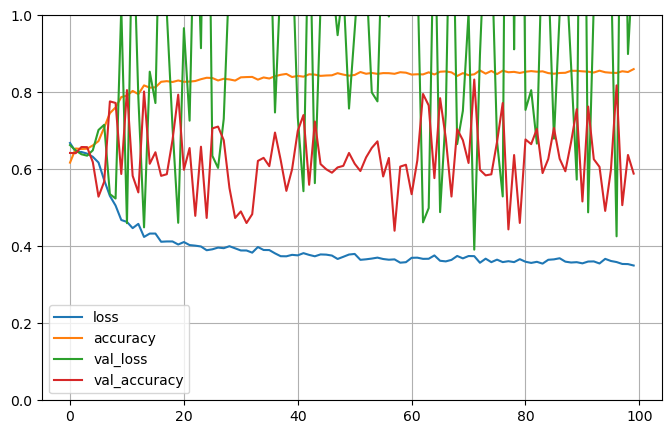

313/313 [==============================] - 1s 2ms/step - loss: 1.1711 - accuracy: 0.5888


[1.17112398147583, 0.5888000130653381]

In [266]:
model_6.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_6 = model_6.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
model_6.evaluate(X_train_validation, y_train_validation)

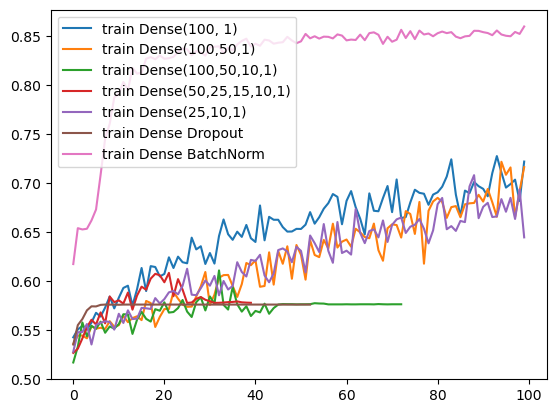

In [267]:
plt.plot(history_1.history['accuracy'], label = "train Dense(100, 1)")

plt.plot(history_2.history['accuracy'], label = "train Dense(100,50,1)")

plt.plot(history_3.history['accuracy'], label = "train Dense(100,50,10,1)")

plt.plot(history_4.history['accuracy'], label = "train Dense(50,25,15,10,1)")

plt.plot(history_7.history['accuracy'], label = "train Dense(25,10,1)")

plt.plot(history_5.history['accuracy'], label = "train Dense Dropout")

plt.plot(history_6.history['accuracy'], label = "train Dense BatchNorm")


plt.legend()
plt.show()

In [268]:
from sklearn import  metrics


models = []
models.append(('Dense(100, 1)', model_1))
models.append(('Dense(100,50,1)', model_2))
models.append(('Dense(100,50,10,1)', model_3))
models.append(('Dense(50,25,15,10,1)', model_4))
models.append(('Dense(25,10,1)', model_7))
models.append(('Dense Dropout', model_5))
models.append(('Dense BatchNorm', model_6))


accuracies = []
for name, model in models:
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

812/812 [==============================] - 2s 2ms/step


In [269]:
import pandas as pd
tab = {'accuracy' : accuracies}
df = pd.DataFrame(data=tab)
df.insert(loc=0, column='Method', value=['Dense(100, 1)', 'Dense(100,50,1)', 'Dense(100,50,10,1)', 'Dense(50,25,15,10,1)', 'Dense(25,10,1)', 'Dense Dropout', 'Dense BatchNorm'])
df

,Method,accuracy
0,"Dense(100, 1)",0.796004
1,"Dense(100,50,1)",0.753272
2,"Dense(100,50,10,1)",0.562442
3,"Dense(50,25,15,10,1)",0.568602
4,"Dense(25,10,1)",0.675508
5,Dense Dropout,0.561018
6,Dense BatchNorm,0.615684


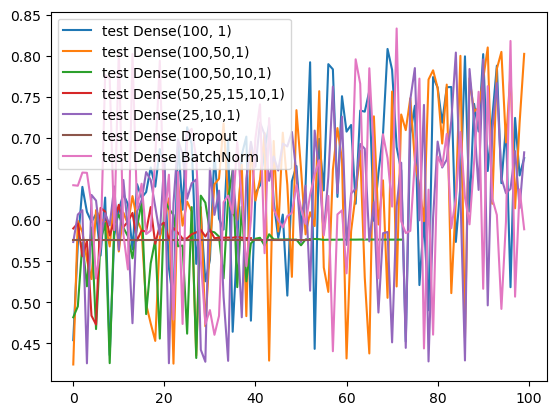

In [270]:
plt.plot(history_1.history['val_accuracy'], label = "test Dense(100, 1)")

plt.plot(history_2.history['val_accuracy'], label = "test Dense(100,50,1)")

plt.plot(history_3.history['val_accuracy'], label = "test Dense(100,50,10,1)")

plt.plot(history_4.history['val_accuracy'], label = "test Dense(50,25,15,10,1)")

plt.plot(history_7.history['val_accuracy'], label = "test Dense(25,10,1)")

plt.plot(history_5.history['val_accuracy'], label = "test Dense Dropout")

plt.plot(history_6.history['val_accuracy'], label = "test Dense BatchNorm")


plt.legend()
plt.show()